<a href="https://colab.research.google.com/github/mammhoud/Foundation_Tasks/blob/main/DecisionTrees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loading Data**


In [24]:
import sklearn.datasets as datasets
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import metrics
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import seaborn as sns

sample_CSV=pd.read_csv('/content/sample_data/Iris - Iris.csv')
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [2]:
target_names = iris.target_names

In [26]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
y=iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

**Create the Data Frame**

# **Feature Selection**
# **Describe the Date**

In [5]:
iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],columns= iris['feature_names'] + ['target'])

In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [7]:
species = []

for i in range(len(iris['target'])):
    if iris['target'][i] == 0:
        #species.append("setosa")
        species.append(target_names[0])
    elif iris['target'][i] == 1:
        #species.append("versicolor")
        species.append(target_names[1])
    else:
        #species.append("virginica")
        species.append(target_names[2])
iris['species'] = species

In [8]:
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
iris.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [10]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
 5   species            150 non-null    object 
dtypes: float64(5), object(1)
memory usage: 7.2+ KB


In [11]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


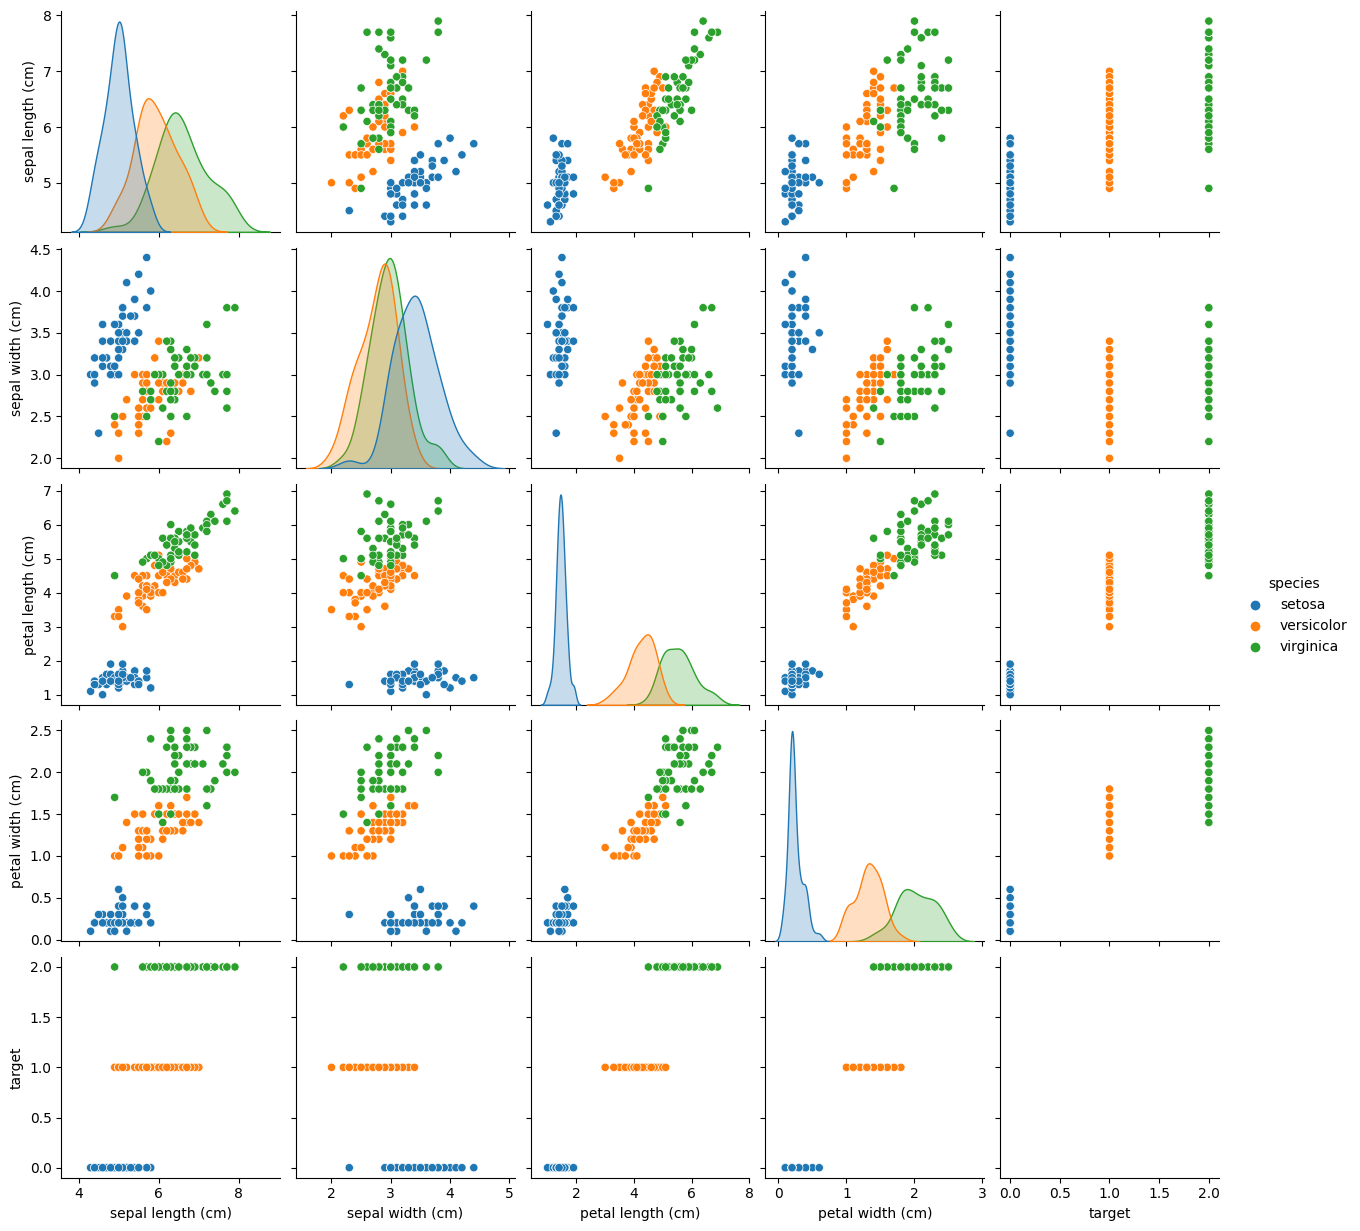

In [12]:
sns.pairplot(iris,hue='species')

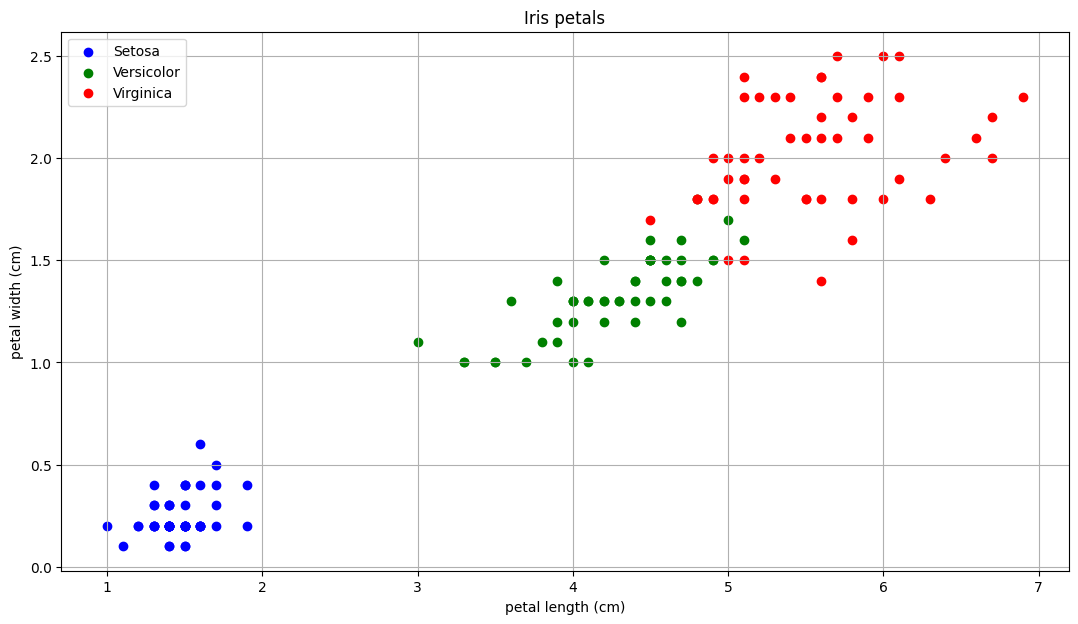

In [13]:

setosa = iris[iris.species == "setosa"]
versicolor = iris[iris.species=='versicolor']
virginica = iris[iris.species=='virginica']

fig, ax = plt.subplots()
fig.set_size_inches(13, 7) # adjusting the length and width of plot

# lables and scatter points
ax.scatter(setosa['petal length (cm)'], setosa['petal width (cm)'], label="Setosa", facecolor="blue")
ax.scatter(versicolor['petal length (cm)'], versicolor['petal width (cm)'], label="Versicolor", facecolor="green")
ax.scatter(virginica['petal length (cm)'], virginica['petal width (cm)'], label="Virginica", facecolor="red")


ax.set_xlabel("petal length (cm)")
ax.set_ylabel("petal width (cm)")
ax.grid()
ax.set_title("Iris petals")
ax.legend()

In [14]:
iris.shape

(150, 6)

In [15]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


# **Building Decision Tree Model**


**Splitting Data**


In [16]:

# Droping the target and species since we only need the measurements
#X = iris.drop(['target','species'], axis=1)

# converting into numpy array and assigning petal length and petal width
X = iris.iloc[:, :-2]
y = iris['target']

# Splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

In [17]:
print("Traingin split:",X_train.shape)
print("Testin spllit:",X_test.shape)

Traingin split: (112, 4)
Testin spllit: (38, 4)


In [18]:
# Defining the decision tree algorithm
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

print('Decision Tree Classifer Created')

Decision Tree Classifer Created


# Evaluating the Model
**Visualizing Decision Trees**


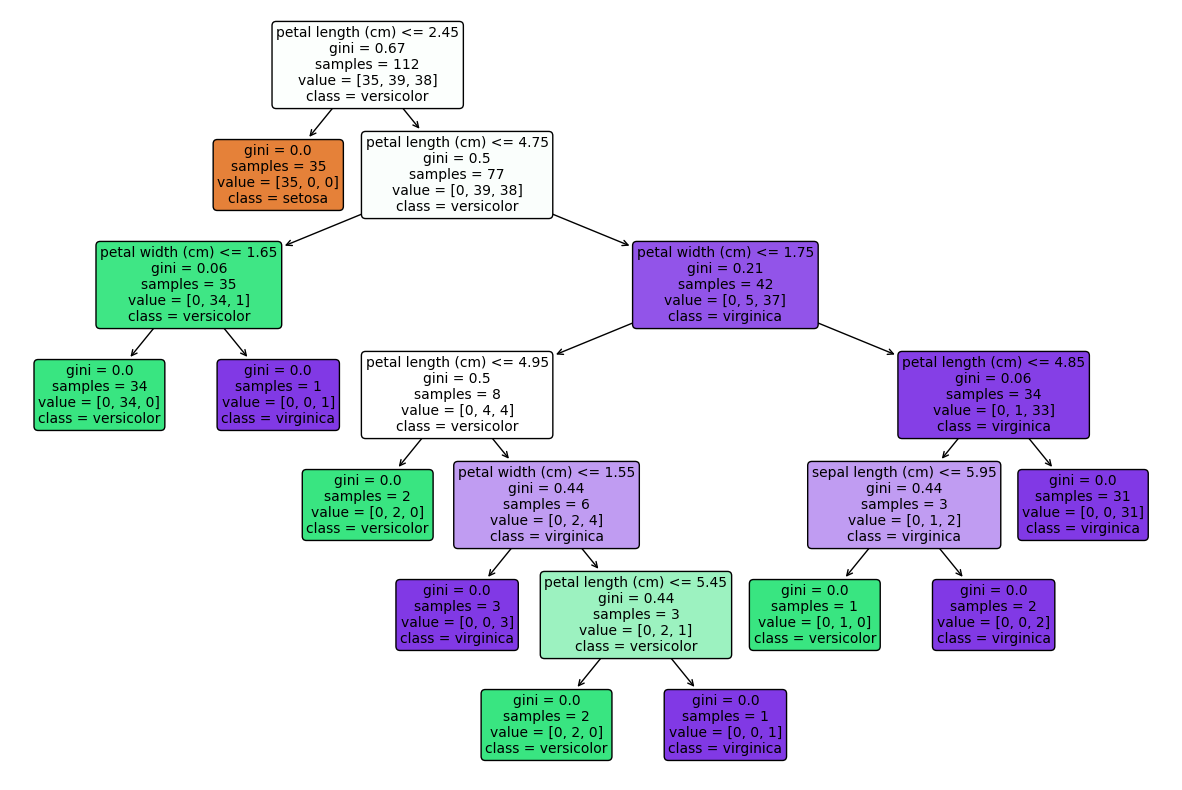

In [28]:
plt.figure(figsize=(15,10))

tree= plot_tree(dtree,
               feature_names=iris.feature_names,
               precision=2,
               filled=True,
               class_names=target_names, rounded=True,fontsize=10)


In [29]:
# Making Predictions with Our Model
y_pred = dtree.predict(X_test)
#print(y_test)
#print(y_pred)

In [30]:
# Measuring the accuracy of our model

print("Accuracy:",accuracy_score(y_test,y_pred))
print("Confusion matrix, in training\n")
# Confusion matrix
print(metrics.confusion_matrix(y_test, y_pred))

Accuracy: 1.0
Confusion matrix, in training

[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


In [31]:
print("Precision, Recall, Scores, in testing\n")
# Precision Recall scores
print(classification_report(y_pred, y_test))

Precision, Recall, Scores, in testing

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        15
         1.0       1.00      1.00      1.00        11
         2.0       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [32]:

# Droping the target and species since we only need the measurements
#X = iris.drop(['target','species'], axis=1)

# converting into numpy array and assigning petal length and petal width
sX = sample_CSV.iloc[:, :-2]
sy = sample_CSV['target']

## Splitting into train and test
#sX_train, sX_test, sy_train, sy_test = train_test_split(X,y,test_size=0.25, random_state=42)

In [33]:
sX.shape


(150, 4)

In [34]:
sy_pred = dtree.predict(sX)


In [35]:
print("Accuracy:",accuracy_score(sy,sy_pred))
print("Confusion matrix, in training\n")
# Confusion matrix
print(metrics.confusion_matrix(sy, sy_pred))

Accuracy: 1.0
Confusion matrix, in training

[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]


In [36]:
print("Precision, Recall, Scores, in testing\n")
# Precision Recall scores
print(classification_report(sy_pred, sy))

Precision, Recall, Scores, in testing

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        50
         1.0       1.00      1.00      1.00        50
         2.0       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150

